In [4]:
import torch
import torch .nn as nn
import torch . optim as optim
from torch . utils . data import DataLoader
import torchvision . transforms as transforms
import torchvision . datasets as datasets


In [8]:
!pip install datasets

In [1]:
!pip install -U datasets fsspec

In [3]:
!pip install pandas

In [7]:
import pandas as pd

url = "hf://datasets/Zhouhc/attack-agnews/agnews_train.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


                                                text  label
0  Despair and Anger in Small Russian Town After ...      0
1  Bob Evans, mainframe pioneer, dies at 77 Evans...      3
2  Agassi Brushes Bjorkman Aside in Stockholm  ST...      1
3  UK scientists bring hydrogen cars closer Briti...      3
4  Chelsea beats defending champion Porto Jose Mo...      1


In [12]:
df.head(1000000)      # Shows the first 10 rows

,text,label
0,Despair and Anger in Small Russian Town After ...,0
1,"Bob Evans, mainframe pioneer, dies at 77 Evans...",3
2,Agassi Brushes Bjorkman Aside in Stockholm ST...,1
3,UK scientists bring hydrogen cars closer Briti...,3
4,Chelsea beats defending champion Porto Jose Mo...,1
...,...,...
107995,Haitians Left in Devasting Wake of Jeanne The ...,0
107996,"Ask Walker about NU #39;s special day MADISON,...",1
107997,West Indies Hold Up England March James Anders...,1
107998,"UN council mulls Sudan resolution, US to speak...",0


In [13]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 857.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [15]:
df_sample = df.sample(frac=0.1, random_state=42).reset_index(drop=True)
texts = df_sample['text'].tolist()

In [16]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, show_progress_bar=True)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/338 [00:00<?, ?it/s]

In [17]:
import torch
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, input_size=384, hidden_size=128, embedding_size=64):
        super(Encoder, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, embedding_size)
        )

    def forward(self, x):
        return self.net(x)

In [18]:
from torch.utils.data import DataLoader, TensorDataset

# Convert to tensor
embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)

# Create DataLoader
dataset = TensorDataset(embeddings_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Encoder().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()  # reconstruction loss (as a placeholder)


In [20]:
# Dummy target = input (like autoencoder)
for epoch in range(5):
    model.train()
    total_loss = 0
    for batch in loader:
        x = batch[0].to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, x[:, :output.shape[1]])  # use input as target
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 0.2919
Epoch 2, Loss: 0.0193
Epoch 3, Loss: 0.0057
Epoch 4, Loss: 0.0024
Epoch 5, Loss: 0.0011


In [21]:
model.eval()
with torch.no_grad():
    latent = model(embeddings_tensor.to(device)).cpu().numpy()


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(latent)

# Evaluation
print("Silhouette Score:", silhouette_score(latent, cluster_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(latent, cluster_labels))


Silhouette Score: 0.03909472
Davies-Bouldin Index: 4.455275428403549


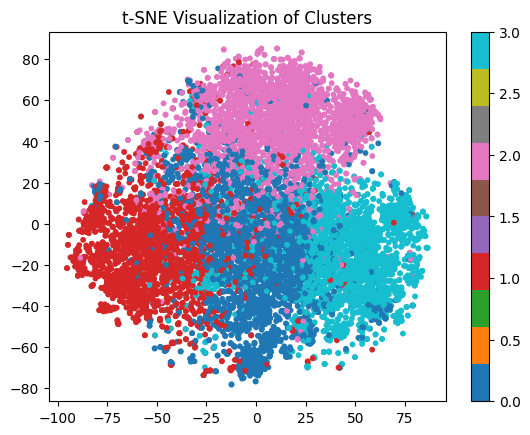

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
proj = tsne.fit_transform(latent)

plt.scatter(proj[:, 0], proj[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title("t-SNE Visualization of Clusters")
plt.colorbar()
plt.show()
